In [1]:
from test import EigenData
import numpy as np
import scipy.io
import h5py
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch
%matplotlib inline

In [2]:
data = EigenData()
eigenworms = data.get_eigenworms('EigenWorms.mat')

footage = data.get_footage('20150814-All-PNAS2011-DataStitched .mat')
newdata = torch.rand(33600,5)
for k in footage.keys():
    print(k, footage[k].shape)
    arr1=footage[k]

    arr2=arr1[:5,]

    r = data.reconstruct(footage[k])
    print('-->', r.shape)
    dataset1 = arr2.transpose()

    newdata = np.concatenate((newdata,dataset1),axis=0)
newdata = newdata[33600:,]
print(newdata.shape)

b (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
c (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
d (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
e (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
f (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
g (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
h (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
i (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
j (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
k (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
l (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
m (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
(403200, 5)


In [3]:
first_5_eigenworms = eigenworms[0:5,:]
eig_worm_0 = eigenworms[0,:]
eig_worm_1 = eigenworms[1,:]
eig_worm_2 = eigenworms[2,:]
eig_worm_3 = eigenworms[3,:]
eig_worm_4 = eigenworms[4,:]

In [4]:
data1=newdata[~np.isnan(newdata).any(axis=1)]
data1 = data1.astype('float32')
print(data1.shape)
print(len(data1))

(386422, 5)
386422


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(data1)

In [6]:
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [7]:
data_X, data_Y = create_dataset(data1)

print(data_X.shape)
print(data_Y.shape)

(386417, 5, 5)
(386417, 5)


In [8]:
train_size = int(len(data_X) * 0.8)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(309133, 5, 5)
(309133, 5)
(77284, 5, 5)
(77284, 5)


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input,LSTM,Dropout,Dense



# create and fit the LSTM network

model = keras.Sequential()
model.add(LSTM(50,input_shape=(5,5),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,input_shape=(5,5),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,input_shape=(5,5),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,input_shape=(5,5),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(5,activation='linear'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(train_X, train_Y, epochs=100, batch_size=512, verbose=2, validation_data=(test_X, test_Y))

Epoch 1/100
604/604 - 22s - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 2/100
604/604 - 15s - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0397
Epoch 3/100
604/604 - 15s - loss: 0.0028 - root_mean_squared_error: 0.0534 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 4/100
604/604 - 15s - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 4.3814e-04 - val_root_mean_squared_error: 0.0209
Epoch 5/100
604/604 - 15s - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 2.5846e-04 - val_root_mean_squared_error: 0.0161
Epoch 6/100
604/604 - 15s - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 2.1921e-04 - val_root_mean_squared_error: 0.0148
Epoch 7/100
604/604 - 15s - loss: 9.0680e-04 - root_mean_squared_error: 0.0301 - val_loss: 2.5632e-04 - val_root_mean_squared_error: 0.0160
Epoch 8/100
604/604 - 15s - loss: 8.4470e-04 - root_mean

Epoch 60/100
604/604 - 15s - loss: 5.7790e-04 - root_mean_squared_error: 0.0240 - val_loss: 7.3953e-05 - val_root_mean_squared_error: 0.0086
Epoch 61/100
604/604 - 15s - loss: 5.7706e-04 - root_mean_squared_error: 0.0240 - val_loss: 5.7724e-05 - val_root_mean_squared_error: 0.0076
Epoch 62/100
604/604 - 15s - loss: 5.7612e-04 - root_mean_squared_error: 0.0240 - val_loss: 7.9465e-05 - val_root_mean_squared_error: 0.0089
Epoch 63/100
604/604 - 15s - loss: 5.7380e-04 - root_mean_squared_error: 0.0240 - val_loss: 9.5672e-05 - val_root_mean_squared_error: 0.0098
Epoch 64/100
604/604 - 15s - loss: 5.7263e-04 - root_mean_squared_error: 0.0239 - val_loss: 7.5907e-05 - val_root_mean_squared_error: 0.0087
Epoch 65/100
604/604 - 15s - loss: 5.7162e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.2802e-05 - val_root_mean_squared_error: 0.0079
Epoch 66/100
604/604 - 15s - loss: 5.7077e-04 - root_mean_squared_error: 0.0239 - val_loss: 1.0160e-04 - val_root_mean_squared_error: 0.0101
Epoch 67/100


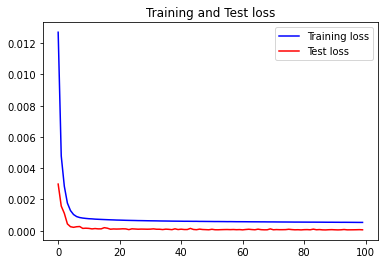

In [10]:
epochs=range(len(history.history['loss']))
plt.figure()
plt.plot(epochs,history.history['loss'],'b',label='Training loss')
plt.plot(epochs,history.history['val_loss'],'r',label='Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()

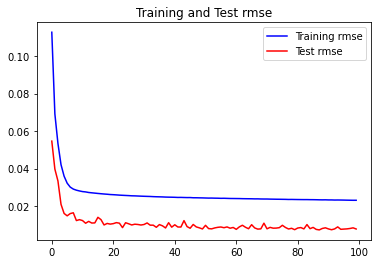

In [11]:
epochs=range(len(history.history['root_mean_squared_error']))
plt.figure()
plt.plot(epochs,history.history['root_mean_squared_error'],'b',label='Training rmse')
plt.plot(epochs,history.history['val_root_mean_squared_error'],'r',label='Test rmse')
plt.title('Training and Test rmse')
plt.legend()
plt.show()

In [12]:
testPredict = model.predict(test_X)

In [15]:
newtestPredict = scaler.inverse_transform(testPredict)
newtest_Y = scaler.inverse_transform(test_Y)

In [16]:
testScore = sqrt(mean_squared_error(newtest_Y, newtestPredict))
print('Test Score: %.5f RMSE' % (testScore))

Test Score: 0.28337 RMSE
